<a href="https://colab.research.google.com/github/Parth7/ML-for-finance/blob/main/NN_VAR_data_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

# Commonly used modules
import numpy as np
import os
import sys

# Images, plots, display, and visualization
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import cv2
import IPython
from six.moves import urllib
import random
print(tf.__version__)

2.5.0


In [2]:
from google.colab import files
uploaded = files.upload()

Saving cummulative_data_NN2.xls to cummulative_data_NN2.xls


In [3]:
file = pd.read_excel('cummulative_data_NN2.xls') 
# Data for three-dimensional scattered points


#(train_features, train_labels), (test_features, test_labels) = keras.datasets.boston_housing.load_data()

# get per-feature statistics (mean, standard deviation) from the training set to normalize by
#train_mean = np.mean(train_features, axis=0)
#train_std = np.std(train_features, axis=0)
#train_features = (train_features - train_mean) / train_std

In [4]:
file = file.to_numpy()

In [5]:
file[:10]

array([[ -8.85993485,   1.        ],
       [ -9.25081433,   1.        ],
       [-10.03257329,   1.        ],
       [ -9.38110749,   1.        ],
       [-10.03257329,   1.        ],
       [ -9.05537459,   1.        ],
       [ -8.40390879,   1.        ],
       [ -8.85993485,   1.        ],
       [ -9.31596091,   1.        ],
       [ -9.12052117,   1.        ]])

In [6]:
np.random.shuffle(file) 

In [7]:
file[:10]

array([[  0.        ,   5.        ],
       [-51.46579805,  44.        ],
       [110.29315961,  46.        ],
       [  0.45602606,  15.        ],
       [  2.21498371,  20.        ],
       [  3.38762215,  20.        ],
       [-10.03257329,  33.        ],
       [  7.16612378,   3.        ],
       [ -1.56351792,  45.        ],
       [104.23452769,  46.        ]])

In [8]:
file[:,0]

array([  0.        , -51.46579805, 110.29315961, ...,   1.10749186,
         1.56351792,  -0.6514658 ])

In [9]:
zdata = file[:,0]
xdata = file[:,1]

data = np.array([xdata])
zd = np.array([zdata])

In [10]:
test_set_size = int(np.round(0.2*data.shape[1]));
train_set_size = data.shape[1] - (test_set_size);

In [11]:
x_train = data[:,:train_set_size]
y_train = zd[:,:train_set_size]

x_test = data[:,train_set_size:]
y_test = zd[:,train_set_size:]

In [12]:
x_train[:15]

array([[ 5., 44., 46., ...,  7., 17.,  5.]])

In [13]:
train_features = x_train

In [35]:
y_train.T.shape

(1, 8000)

In [36]:
x_train.T.shape

(1, 8000)

In [16]:
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

In [28]:
from __future__ import absolute_import, division, print_function, unicode_literals

import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.5.0


In [33]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(y_train[0])]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [34]:
model = build_model();
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                128       
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 4,353
Trainable params: 4,353
Non-trainable params: 0
_________________________________________________________________


In [37]:
#before training
example_batch = y_train[:10]
example_result = model.predict(example_batch)
example_result

array([[  0.        ],
       [ -3.0138412 ],
       [-24.179173  ],
       [ -0.09997296],
       [ -0.485583  ],
       [ -0.74265623],
       [ -0.58750856],
       [ -1.5710039 ],
       [ -0.09155975],
       [-22.850964  ]], dtype=float32)

In [38]:
x_train[:10]

array([[ 5.],
       [44.],
       [46.],
       [15.],
       [20.],
       [20.],
       [33.],
       [ 3.],
       [45.],
       [46.]])

In [39]:
x_test[1].T

array([18.])

In [40]:
x_test[0:1]

array([[18.]])

In [41]:
y_test[0:1]

array([[22.28013029]])

In [42]:
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 1000

history = model.fit(
  y_train, x_train,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [46]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,151.169647,10.110660,151.169647,155.152054,10.338340,155.152054,995
996,151.243744,10.115831,151.243744,164.555573,10.469356,164.555573,996
997,151.174164,10.104841,151.174164,155.503113,10.158031,155.503113,997
998,150.927368,10.109345,150.927368,155.795212,10.089651,155.795212,998
999,151.394440,10.100582,151.394440,152.978561,10.085572,152.978561,999


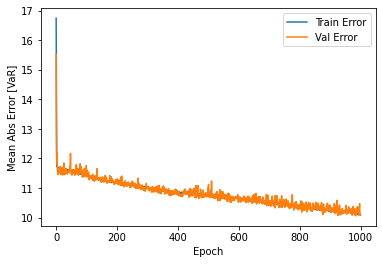

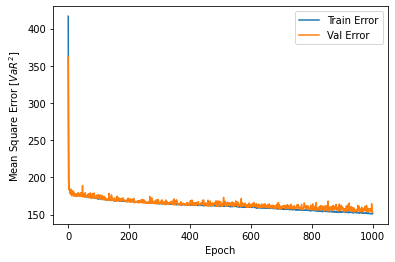

In [47]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [VaR]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  #plt.ylim([0,5])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$VaR^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  #plt.ylim([0,20])
  plt.legend()
  plt.show()


plot_history(history)

In [48]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(y_train, x_train, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])


.........................

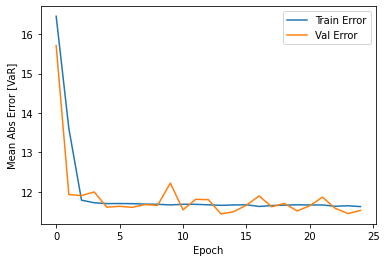

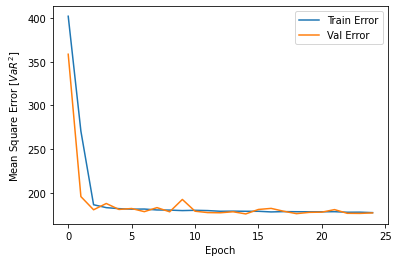

In [49]:
plot_history(history)

In [51]:
loss, mae, mse = model.evaluate(y_test, x_test, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} VaR".format(mae))

63/63 - 0s - loss: 173.9455 - mae: 11.3704 - mse: 173.9455
Testing set Mean Abs Error: 11.37 VaR


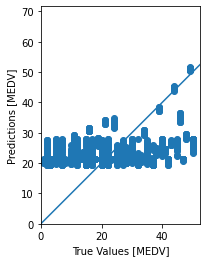

In [54]:
test_predictions = model.predict(y_test).flatten()
train_predictions = model.predict(y_train).flatten()

plt.scatter(x_test, test_predictions)
plt.xlabel('True Values [MEDV]')
plt.ylabel('Predictions [MEDV]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])